# Homework - Principal Components Analysis


## Libraries

In [66]:
from sklearn.preprocessing import OneHotEncoder   
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib as plt
import yaml
from matplotlib import cm 
import matplotlib.pyplot as plt

## 0. Preparation (Setting the Random State):

In [67]:
pellegrino = 331438
mungaicoppolino = 246120
rs = min(pellegrino, mungaicoppolino)
np.random.seed(rs)
initial_random_state = np.random.get_state()
np.random.set_state(initial_random_state)

## 1. Loading and Preparing the Data


### 1.1 Storing the csv file in a DataFrame Variable

We store in the variable df_tot the dataframe obtained from the csv file.

In [68]:
df_tot = pd.read_csv("cla4lsp_customers.csv", sep='\t')
df_tot.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


### 1.2 Sub-DFs Creation

Creation of the sub dataframes *workdf*: 2/3 of the rows are taken from the original dataframes df_tot

In [69]:
workdf = df_tot.sample(frac=2/3, random_state=rs)
workdf.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
762,6406,1988,Master,Married,78285.0,0,0,28-10-2013,13,647,...,3,0,0,0,0,0,0,3,11,0
2206,1092,1980,Graduation,Married,61014.0,0,1,11-08-2012,17,269,...,7,0,0,0,0,0,0,3,11,0
419,8581,1971,Master,Married,49505.0,1,1,05-03-2013,4,604,...,8,0,0,0,0,0,0,3,11,0
1370,5948,1975,Graduation,Single,57338.0,0,1,29-04-2014,96,143,...,5,0,0,0,0,0,0,3,11,0
1775,8910,1955,Graduation,Together,42586.0,1,1,29-10-2012,7,194,...,8,0,0,0,0,0,0,3,11,1


### 1.3 Labels and Features

Discarding the ID, Z_CostContact and Z_Revenue columns

In [70]:
labels = ['NumDealsPurchases',
'AcceptedCmp1',
'AcceptedCmp2',
'AcceptedCmp3',
'AcceptedCmp4',
'AcceptedCmp5',
'Response',
'Complain',
'Recency'] #len(labels) == 9

features = [
    'Year_Birth',
    'Education',
    'Marital_Status',
    'Income',
    'Kidhome',
    'Teenhome',
    'Dt_Customer',
    'MntWines', 
    'MntFruits', 
    'MntMeatProducts',
    'MntFishProducts',
    'MntSweetProducts', 
    'MntGoldProds', 
    'NumWebPurchases', 
    'NumCatalogPurchases',
    'NumStorePurchases',
    'NumWebVisitsMonth'
] #len(features) == 17 
workdf = workdf.loc[:, labels + features]
workdf.head()


,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain,Recency,Year_Birth,...,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
762,1,0,0,0,0,0,0,0,13,1988,...,647,107,391,175,67,40,6,4,10,3
2206,4,0,0,0,0,0,0,0,17,1980,...,269,129,495,182,43,29,9,3,4,7
419,9,0,0,0,0,0,0,0,4,1971,...,604,0,100,19,0,28,10,2,8,8
1370,2,0,0,0,0,0,0,0,96,1975,...,143,6,52,11,8,17,4,1,5,5
1775,5,0,0,0,0,0,1,0,7,1955,...,194,2,56,0,0,0,4,1,6,8


### 1.4 Removing randomly from workdf one feature

In [71]:
purchase_features = ['MntWines', 
                    'MntFruits', 
                    'MntMeatProducts',
                    'MntFishProducts',
                    'MntSweetProducts', 
                    'MntGoldProds', 
                    'NumWebPurchases', 
                    'NumCatalogPurchases',
                    'NumStorePurchases']

removed_feature = np.random.choice(purchase_features)
workdf = workdf.drop(columns=removed_feature)
features.remove(removed_feature)
print(f"Feature removed: {removed_feature}\nFirst elements of the workdf Dataframes:")
display(workdf.head())



Feature removed: NumStorePurchases
First elements of the workdf Dataframes:


,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain,Recency,Year_Birth,...,Dt_Customer,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumWebVisitsMonth
762,1,0,0,0,0,0,0,0,13,1988,...,28-10-2013,647,107,391,175,67,40,6,4,3
2206,4,0,0,0,0,0,0,0,17,1980,...,11-08-2012,269,129,495,182,43,29,9,3,7
419,9,0,0,0,0,0,0,0,4,1971,...,05-03-2013,604,0,100,19,0,28,10,2,8
1370,2,0,0,0,0,0,0,0,96,1975,...,29-04-2014,143,6,52,11,8,17,4,1,5
1775,5,0,0,0,0,0,1,0,7,1955,...,29-10-2012,194,2,56,0,0,0,4,1,8


### 1.5 Clean the dataset workdf

NaN value were found in the column *'Income'*. For sake of simplicity, rows with NaN value in that column are suppressed.

In [72]:
tmp_df = workdf.loc[:, features]
df_nan = tmp_df[tmp_df.isna().any(axis=1)]
print("Dataframes where there are NaN values (df_nan):\n")
display(df_nan)
workdf = workdf.dropna()
print("workdf without df_nan:\n")
display(workdf)

Dataframes where there are NaN values (df_nan):



,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumWebVisitsMonth
58,1982,Graduation,Single,NaN,1,0,17-06-2013,11,3,22,2,2,6,2,0,6
1382,1958,Graduation,Together,NaN,1,1,03-09-2012,19,4,12,2,2,6,1,0,5
71,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,3,43,17,4,17,3,0,8
90,1957,PhD,Married,NaN,2,1,19-11-2012,230,42,192,49,37,53,7,2,9
133,1963,Graduation,Married,NaN,0,1,11-08-2013,231,65,196,38,71,124,6,5,4
1386,1972,PhD,Together,NaN,1,0,02-03-2014,25,1,13,0,0,3,1,0,7
312,1989,Graduation,Married,NaN,0,0,03-06-2013,861,138,461,60,30,61,6,5,3
2061,1981,PhD,Single,NaN,1,0,31-05-2013,23,0,15,0,2,7,3,0,6
10,1983,Graduation,Married,NaN,1,0,15-11-2013,5,5,6,0,2,1,1,0,7
48,1951,Graduation,Single,NaN,2,1,01-01-2014,48,5,48,6,10,7,2,1,6


workdf without df_nan:



,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain,Recency,Year_Birth,...,Dt_Customer,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumWebVisitsMonth
762,1,0,0,0,0,0,0,0,13,1988,...,28-10-2013,647,107,391,175,67,40,6,4,3
2206,4,0,0,0,0,0,0,0,17,1980,...,11-08-2012,269,129,495,182,43,29,9,3,7
419,9,0,0,0,0,0,0,0,4,1971,...,05-03-2013,604,0,100,19,0,28,10,2,8
1370,2,0,0,0,0,0,0,0,96,1975,...,29-04-2014,143,6,52,11,8,17,4,1,5
1775,5,0,0,0,0,0,1,0,7,1955,...,29-10-2012,194,2,56,0,0,0,4,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1732,1,0,0,1,0,0,0,0,90,1955,...,27-04-2013,18,2,10,0,0,25,1,1,7
358,1,0,0,0,0,0,0,1,65,1943,...,20-08-2013,629,17,177,69,0,8,5,3,2
1118,1,0,0,0,0,0,0,0,47,1966,...,16-01-2013,2,23,11,8,6,46,2,1,8
1520,1,0,0,0,0,0,1,0,73,1983,...,03-06-2013,910,111,724,49,74,55,10,2,3


## 2. Exercise 2 (Encoding of Categorical Data)

In [73]:
OHE = OneHotEncoder()
transformed = OHE.fit_transform(workdf.loc[:, ['Education', 'Marital_Status']])
# stiamo aggiungendo delle nuove colonne usando i titoli creati dal transformer e i dati transformati salvati come array
workdf[OHE.get_feature_names_out()] = transformed.toarray()
workdf = workdf.drop(columns=['Education', 'Marital_Status'])

features = [item for item in features if item not in ['Education', 'Marital_Status', 'Dt_Customer']]
features = features + list(OHE.get_feature_names_out())

display(workdf)

,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain,Recency,Year_Birth,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
762,1,0,0,0,0,0,0,0,13,1988,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2206,4,0,0,0,0,0,0,0,17,1980,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
419,9,0,0,0,0,0,0,0,4,1971,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1370,2,0,0,0,0,0,0,0,96,1975,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1775,5,0,0,0,0,0,1,0,7,1955,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1732,1,0,0,1,0,0,0,0,90,1955,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
358,1,0,0,0,0,0,0,1,65,1943,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1118,1,0,0,0,0,0,0,0,47,1966,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1520,1,0,0,0,0,0,1,0,73,1983,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Dt_customer is handled differently. Major importance to old data, rescaled from 0 to 600

In [74]:
column_names = ['Dt_Customer_Day', 'Dt_Customer_Month', 'Dt_Customer_Year']

# Split the column into three columns: 'Day', 'Month', 'Year'
workdf[column_names] = workdf['Dt_Customer'].str.split('-', expand=True)


workdf[column_names] = workdf[column_names].astype(int)

workdf = workdf.drop(columns='Dt_Customer')

features = features + column_names
display(workdf.columns)
display(features)


Index(['NumDealsPurchases', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain', 'Recency',
       'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumWebVisitsMonth', 'Education_2n Cycle', 'Education_Basic',
       'Education_Graduation', 'Education_Master', 'Education_PhD',
       'Marital_Status_Absurd', 'Marital_Status_Alone',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'Marital_Status_YOLO', 'Dt_Customer_Day',
       'Dt_Customer_Month', 'Dt_Customer_Year'],
      dtype='object')

['Year_Birth',
 'Income',
 'Kidhome',
 'Teenhome',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumWebVisitsMonth',
 'Education_2n Cycle',
 'Education_Basic',
 'Education_Graduation',
 'Education_Master',
 'Education_PhD',
 'Marital_Status_Absurd',
 'Marital_Status_Alone',
 'Marital_Status_Divorced',
 'Marital_Status_Married',
 'Marital_Status_Single',
 'Marital_Status_Together',
 'Marital_Status_Widow',
 'Marital_Status_YOLO',
 'Dt_Customer_Day',
 'Dt_Customer_Month',
 'Dt_Customer_Year']

Now Xworkdf

In [75]:
Xworkdf = workdf[features]
#display(Xworkdf)

## 3. Exercise 3 (Preprocessing and full-PCA)

Creation of the two DFs *Xworkdf_std* and *Xworksf_mm*, created using a StandardScaler and a MinMaxScaler

In [76]:
SScaler = StandardScaler()
MMScaler = MinMaxScaler()

Xworkdf_std = SScaler.fit_transform(Xworkdf)
Xworkdf_mm = MMScaler.fit_transform(Xworkdf)

In [77]:
np.array(Xworkdf.var())

array([1.51408151e+02, 4.80455196e+08, 2.89490342e-01, 2.89463738e-01,
       1.11702565e+05, 1.66387483e+03, 5.04766621e+04, 2.94868232e+03,
       1.70392911e+03, 2.69471048e+03, 7.94848288e+00, 8.76933761e+00,
       6.04991716e+00, 8.64089480e-02, 2.63663436e-02, 2.50160088e-01,
       1.41155349e-01, 1.66338234e-01, 6.77048070e-04, 2.02839198e-03,
       9.61270649e-02, 2.35058613e-01, 1.70978490e-01, 1.93817395e-01,
       2.95589280e-02, 6.77048070e-04, 7.58579896e+01, 1.20045770e+01,
       4.80778440e-01])

In [86]:
np.array(Xworkdf_mm.var())

array(0.10540144)

In [97]:
Xworkdf_std[:, 0].mean()

-6.062704690194085e-15

Below are shown the plots of *Xworkdf*,

In [93]:
len(Xworkdf_mm[0])

29

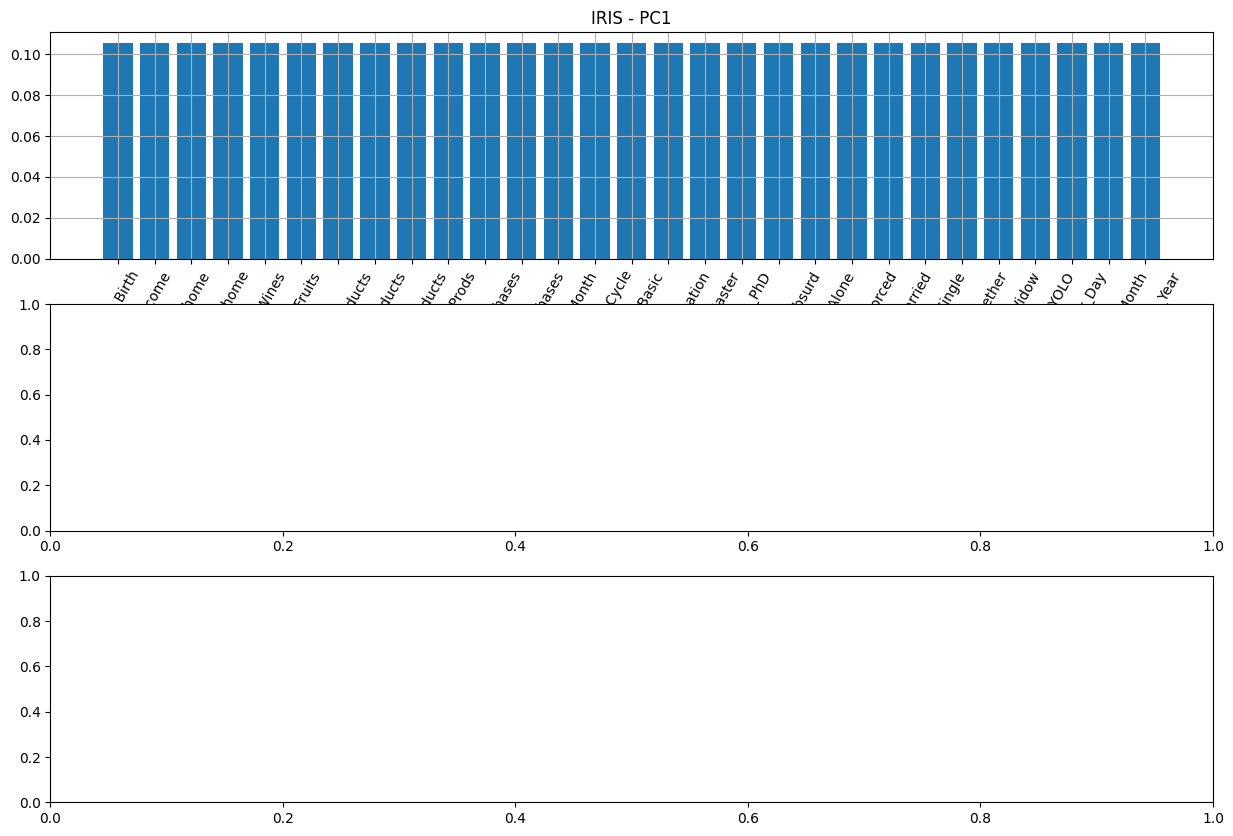

In [95]:
tab10 = cm.tab10.colors

fig, ax = plt.subplots(3, 1, figsize=(15, 10))
ax[0].bar(np.arange(Xworkdf.shape[1]), np.array(Xworkdf_mm.var()))
ax[0].set_xticks(ticks=np.arange(Xworkdf.shape[1]), 
           labels=Xworkdf.columns.to_list(),
           rotation=60)
ax[0].set_title('IRIS - PC1')
ax[0].grid(visible=True, which='both')


plt.show()



In [ ]:
ax[1].bar(np.arange(Xworkdf.shape[1]), Xworkdf.var(), color=tab10[:4])
ax[1].set_xticks(ticks=np.arange(Xworkdf.shape[1]), 
           labels=Xworkdf.columns.to_list(),
           rotation=15)
ax[1].set_title('IRIS - PC1')
ax[1].grid(visible=True, which='both')

ax[2].bar(np.arange(Xworkdf.shape[1]), Xworkdf.var(), color=tab10[:4])
ax[2].set_xticks(ticks=np.arange(Xworkdf.shape[1]), 
           labels=Xworkdf.columns.to_list(),
           rotation=15)
ax[2].set_title('IRIS - PC1')
ax[2].grid(visible=True, which='both')


Year_Birth                 1.514082e+02
Income                     4.804552e+08
Kidhome                    2.894903e-01
Teenhome                   2.894637e-01
MntWines                   1.117026e+05
MntFruits                  1.663875e+03
MntMeatProducts            5.047666e+04
MntFishProducts            2.948682e+03
MntSweetProducts           1.703929e+03
MntGoldProds               2.694710e+03
NumWebPurchases            7.948483e+00
NumCatalogPurchases        8.769338e+00
NumWebVisitsMonth          6.049917e+00
Education_2n Cycle         8.640895e-02
Education_Basic            2.636634e-02
Education_Graduation       2.501601e-01
Education_Master           1.411553e-01
Education_PhD              1.663382e-01
Marital_Status_Absurd      6.770481e-04
Marital_Status_Alone       2.028392e-03
Marital_Status_Divorced    9.612706e-02
Marital_Status_Married     2.350586e-01
Marital_Status_Single      1.709785e-01
Marital_Status_Together    1.938174e-01
Marital_Status_Widow       2.955893e-02


In [ ]:
var_list = [Xworkdf.var(), Xworkdf_std.var(), Xworkdf_mm.var()]
['Xworkdf', 'Xworkdf_std', 'Xorkdf_mm']
tab10 = cm.tab10.colors
#fig, ax = plt.subplots()

##ax.bar(['Xworkdf', 'Xworkdf_std', 'Xorkdf_mm'], [Xworkdf.var(), Xworkdf_std.var(), Xworkdf_mm.var()])
plt.figure()
plt.bar(np.arange(3), [Xworkdf.var(), Xworkdf_std.var(), Xworkdf_mm.var()].toarray())
plt.xticks(ticks=np.arange(3), 
           labels = ['Xworkdf', 'Xworkdf_std', 'Xorkdf_mm'],
           rotation=15)
plt.title('IRIS - PC1')
plt.grid()
plt.show()

AttributeError: 'list' object has no attribute 'toarray'

<Figure size 640x480 with 0 Axes>